In [1]:
pip install pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [4]:
# Load the data file (replace with your path)
data = pd.read_csv("/content/Walmart.csv")

# View the first few rows
print(data.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [5]:
print(data.columns)


Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [6]:
print(data.isnull().sum())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [7]:
features = data[['Temperature', 'Fuel_Price', 'CPI']]
target = data['Weekly_Sales']


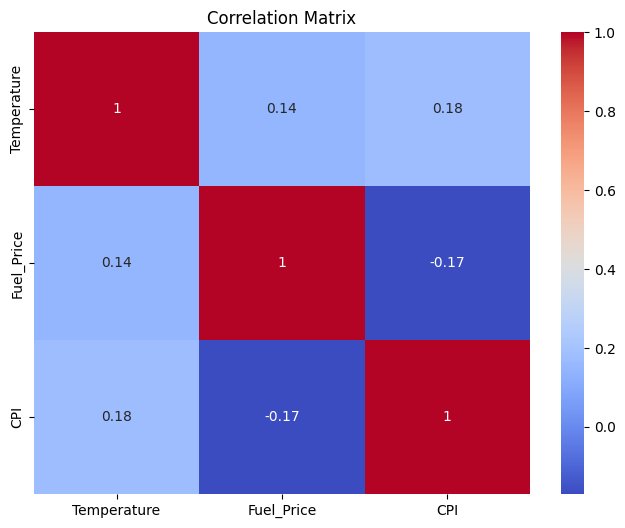

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


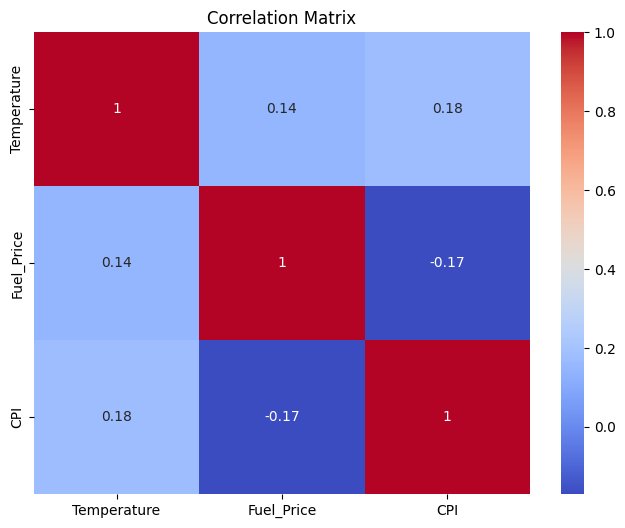

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [10]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 1044626.6096886927
Coefficients: [-27824.51160698   -593.84900459 -35506.55054361]


In [14]:
# Predict Weekly Sales
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared: 0.009243051449552397
Root Mean Squared Error (RMSE): 564957.4084991855


In [15]:
coefficients = pd.DataFrame({'Feature': ['Temperature', 'Fuel_Price', 'CPI'],
                             'Coefficient': model.coef_})
print(coefficients)


       Feature   Coefficient
0  Temperature -27824.511607
1   Fuel_Price   -593.849005
2          CPI -35506.550544


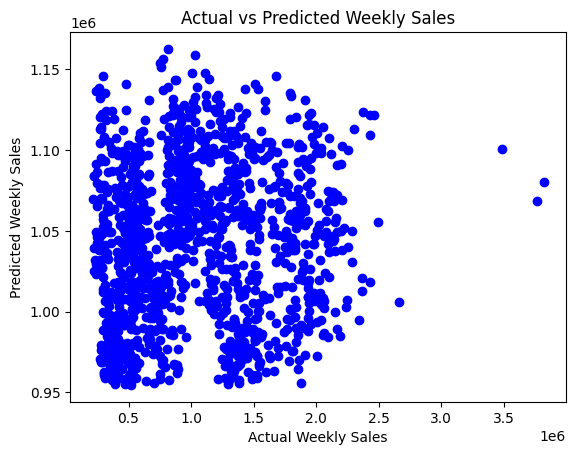

In [16]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales")
plt.show()


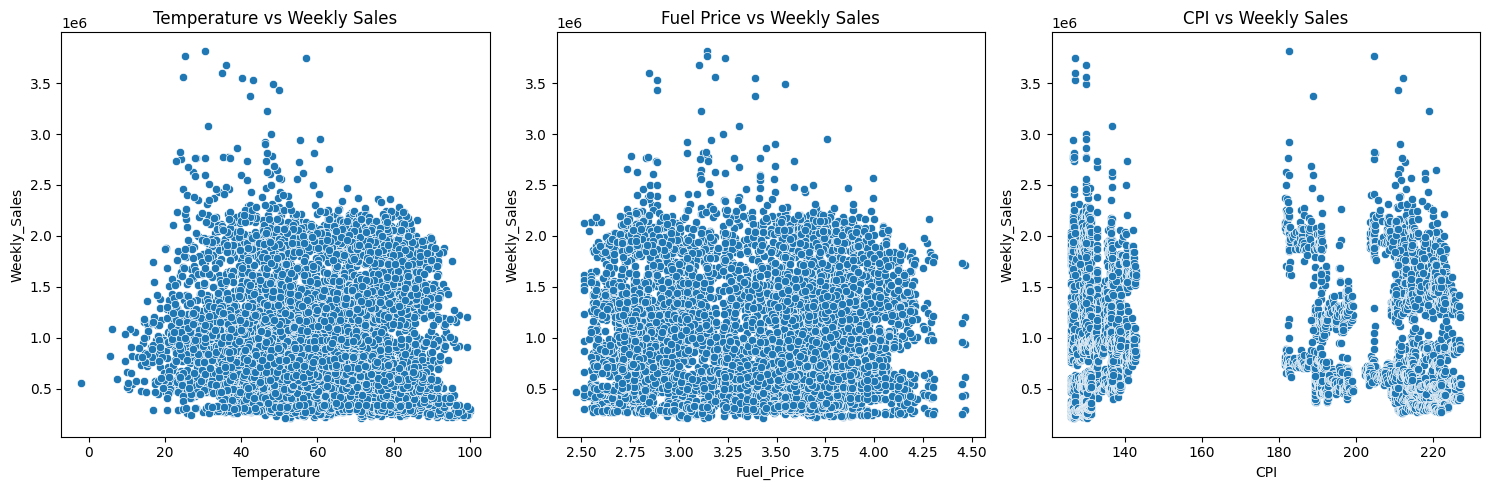

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=data, x="Temperature", y="Weekly_Sales", ax=axes[0])
sns.scatterplot(data=data, x="Fuel_Price", y="Weekly_Sales", ax=axes[1])
sns.scatterplot(data=data, x="CPI", y="Weekly_Sales", ax=axes[2])

axes[0].set_title("Temperature vs Weekly Sales")
axes[1].set_title("Fuel Price vs Weekly Sales")
axes[2].set_title("CPI vs Weekly Sales")
plt.tight_layout()
plt.show()
